In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1= pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
g= df1.groupby("area_type")

In [6]:
for area_type, area_type_df1 in g:
    print(area_type)
    print(area_type_df1)

Built-up  Area
            area_type   availability               location       size  \
2      Built-up  Area  Ready To Move            Uttarahalli      3 BHK   
13     Built-up  Area  Ready To Move              Gottigere      2 BHK   
20     Built-up  Area  Ready To Move                Kengeri      1 BHK   
27     Built-up  Area         20-Dec             Whitefield      3 BHK   
34     Built-up  Area  Ready To Move          Kasturi Nagar      3 BHK   
...               ...            ...                    ...        ...   
13280  Built-up  Area  Ready To Move               Sarjapur      3 BHK   
13307  Built-up  Area  Ready To Move           Billekahalli      3 BHK   
13308  Built-up  Area  Ready To Move      Bannerghatta Road      3 BHK   
13315  Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13317  Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   

       society total_sqft  bath  balcony  price  
2          NaN       1440   2.0      3.0   62.

In [7]:
df1.groupby("area_type")["area_type"].agg("count") 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df1.groupby("area_type")["bath"].mean()

area_type
Built-up  Area          2.649378
Carpet  Area            2.505747
Plot  Area              3.893479
Super built-up  Area    2.430386
Name: bath, dtype: float64

Data Cleaning

In [9]:
df2= df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()      #Drop columns 

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()   #count null in each column 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3=df2.dropna()            #drop null values from df2
print(df3.isnull().sum())   #count null in each column 

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


In [12]:
df3['size'].unique()   #find unique name under size

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk']=  df3['size'].apply(lambda x: int(x.split(' ')[0]))    # 'bhk' would be a new column and from above cell we may see there 
                                                                   # are unique values in different name so we have to apply Labda function 
                                                                   # to create a new column where all values would be intigers 
                                                                   # and no similaar unique vales in different name 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3.bhk>20

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319    False
Name: bhk, Length: 13246, dtype: bool

In [17]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(50)    # ~ is  nigut operation negate means nullify a operation. works like it can actually inverse operation

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
def conv_range_to_num(x):
    s= x.split('-')
    if len(s) ==2:
        return (float(s[0])+float(s[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df4=df3.copy()
df4['total_sqft']= df4['total_sqft'].apply(conv_range_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [27]:
df5=df4.copy()
df5['price_per_sqft']= (df5['price']*100000)/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
len(df5['location'].unique())

1304

In [29]:
df5.location= df5.location.apply(lambda x: x.strip())  #operation is done for removing empty space and space after location name
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [30]:
count_by_location = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
count_by_location.head()

location
Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
Name: location, dtype: int64

In [31]:
count_by_location.count()

1293

In [32]:
len(count_by_location[count_by_location<10])

1039

In [33]:
location_less_than_ten = (count_by_location[count_by_location<10])
len(location_less_than_ten)


1039

In [34]:
df5.location = df5.location. apply(lambda x: 'other' if x in location_less_than_ten else x)
len(df5.location.unique())

255

In [ ]:
df5.head(10)

In [ ]:
#But intersting thing is you may also have some values in given list which may be incorrect

#Suppose, in given list, there may have some values like (total_sqft/bkh must be > 100, you get this information 
# ... from your business manager who is a real state expart, says that 300 sq.ft. per bedroom is a threshold 
#.... for typical size home, so you have to filter those outliers

In [35]:
df5[(df5.total_sqft/df5.bhk)<100]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3.333333e+04
349,other,3 Bedroom,11.0,3.0,74.0,3,6.727273e+05
770,other,9 Bedroom,600.0,9.0,190.0,9,3.166667e+04
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,1.200000e+04
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,2.857143e+04
1020,other,1 BHK,15.0,1.0,30.0,1,2.000000e+05
1103,5th Phase JP Nagar,9 Bedroom,812.0,6.0,165.0,9,2.032020e+04
1122,other,5 Bedroom,24.0,2.0,150.0,5,6.250000e+05
1490,Malleshwaram,9 Bedroom,750.0,8.0,150.0,9,2.000000e+04
1567,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,5.000000e+04


In [36]:
df6= df5[~((df5.total_sqft/df5.bhk)<100)]

In [37]:
df5.shape

(13246, 7)

In [38]:
df6.shape

(13206, 7)

In [39]:
df6.price_per_sqft.describe()

count     13160.000000
mean       6666.830652
std        4508.228739
min         267.829813
25%        4262.948207
50%        5425.015738
75%        7285.438507
max      176470.588235
Name: price_per_sqft, dtype: float64

Cutting out outliers

In [40]:
# pps : price per squre feet
# this cell filters out outliers from the data set 
# so we first calculated the mean value and Standered Deviation and then kept only the data which only belongs 
# ... to first SD 


def remove_pps_outliers(df):
    df_out = pd.DataFrame()                                             
    for key, subdf in df.groupby('location'):                    # key are the index of data set 
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduce_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)                       # concat means add 
    return df_out

df7 =remove_pps_outliers(df6)
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.00,7,9139.784946
...,...,...,...,...,...,...,...
10904,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10905,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10906,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10907,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


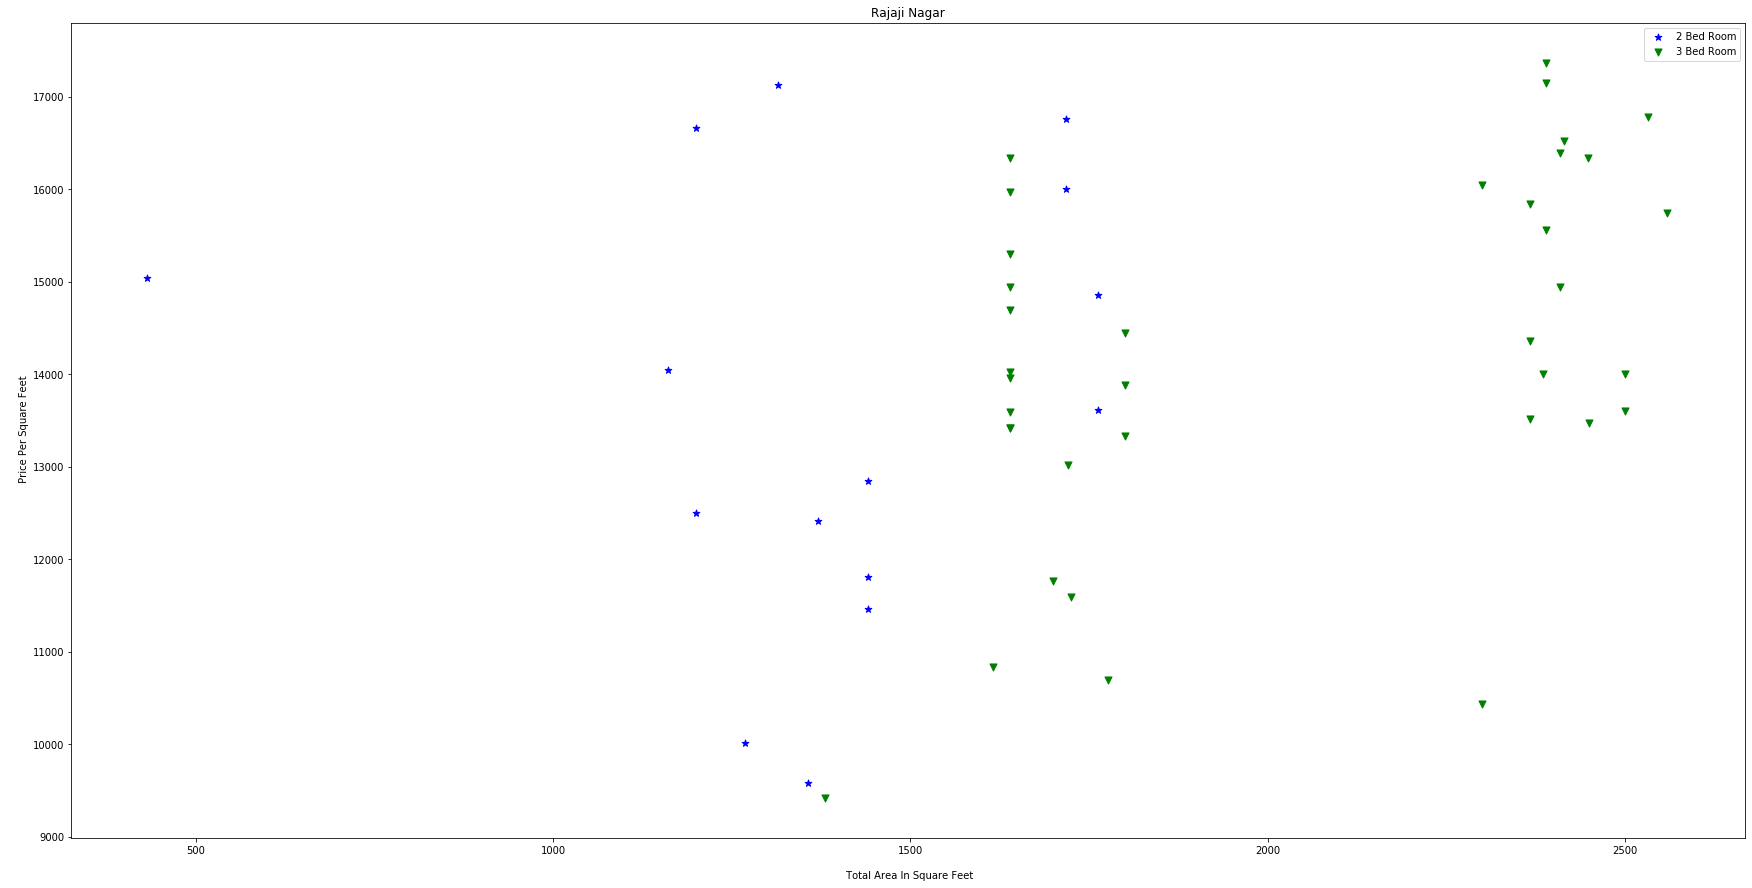

In [41]:
def scatter_plot(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    #bhk1 = df[(df.location==location) & (df.bhk==1)]
    #bhk4 = df[(df.location==location) & (df.bhk==4)]
    matplotlib.rcParams['figure.figsize'] = (30,15)    #  rc Params: Runtime Configaration Parameteres of default matplotlib settings 
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, marker = '*', color ='blue', label = '2 Bed Room', s= 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker = 'v', color ='green', label = '3 Bed Room', s= 50)
    #plt.scatter(bhk4.total_sqft, bhk4.price_per_sqft, marker = '<', color ='black', label = '4 Bed Room', s= 50)
    #plt.scatter(bhk1.total_sqft, bhk1.price_per_sqft, marker = '+', color ='red', label = '1 Bed Room', s= 50)
    plt.xlabel("\n Total Area In Square Feet")
    plt.ylabel("\n Price Per Square Feet")
    plt.title(location)
    plt.legend()

scatter_plot(df7, "Rajaji Nagar")

In [ ]:


# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()
#     for key, subdf in df.groupby('location'):                         # key are the index of data set 
#         print(key)
#     return df_out

# df7 =remove_pps_outliers(df6)
# df7.shape



In [ ]:
#     df_out = pd.DataFrame()                                             
#     for key, subdf in df6.groupby('location'):                    # key are the index of data set 
#         m = np.mean(subdf.price_per_sqft)
#         st = np.std(subdf.price_per_sqft)
#         reduce_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<(m+st))]
#         df_out = pd.concat([df_out, reduce_df], ignore_index=True)                       # concat means add 
#         print(reduce_df)


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment less than 2 bedroom aoartment (with same squarefeet) . 
Now for given location, we will build a dictionary per bedroom

{
    '1': {
        'mean': 4000
        'std': 2000
        'count': 34
     },
     '2': {
        'mean': 4300
        'std': 2300
        'count': 22
     },
}

Now we can remove those 2 Bedroom apartments whose price_per_sqft of 1 Bedroom apartment

In [42]:
df111=pd.concat([df7[df7.bhk==2]], ignore_index= True)         
df111.price.count()

4909

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats= {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8= remove_bhk_outliers(df7)
df8.shape

(7871, 7)

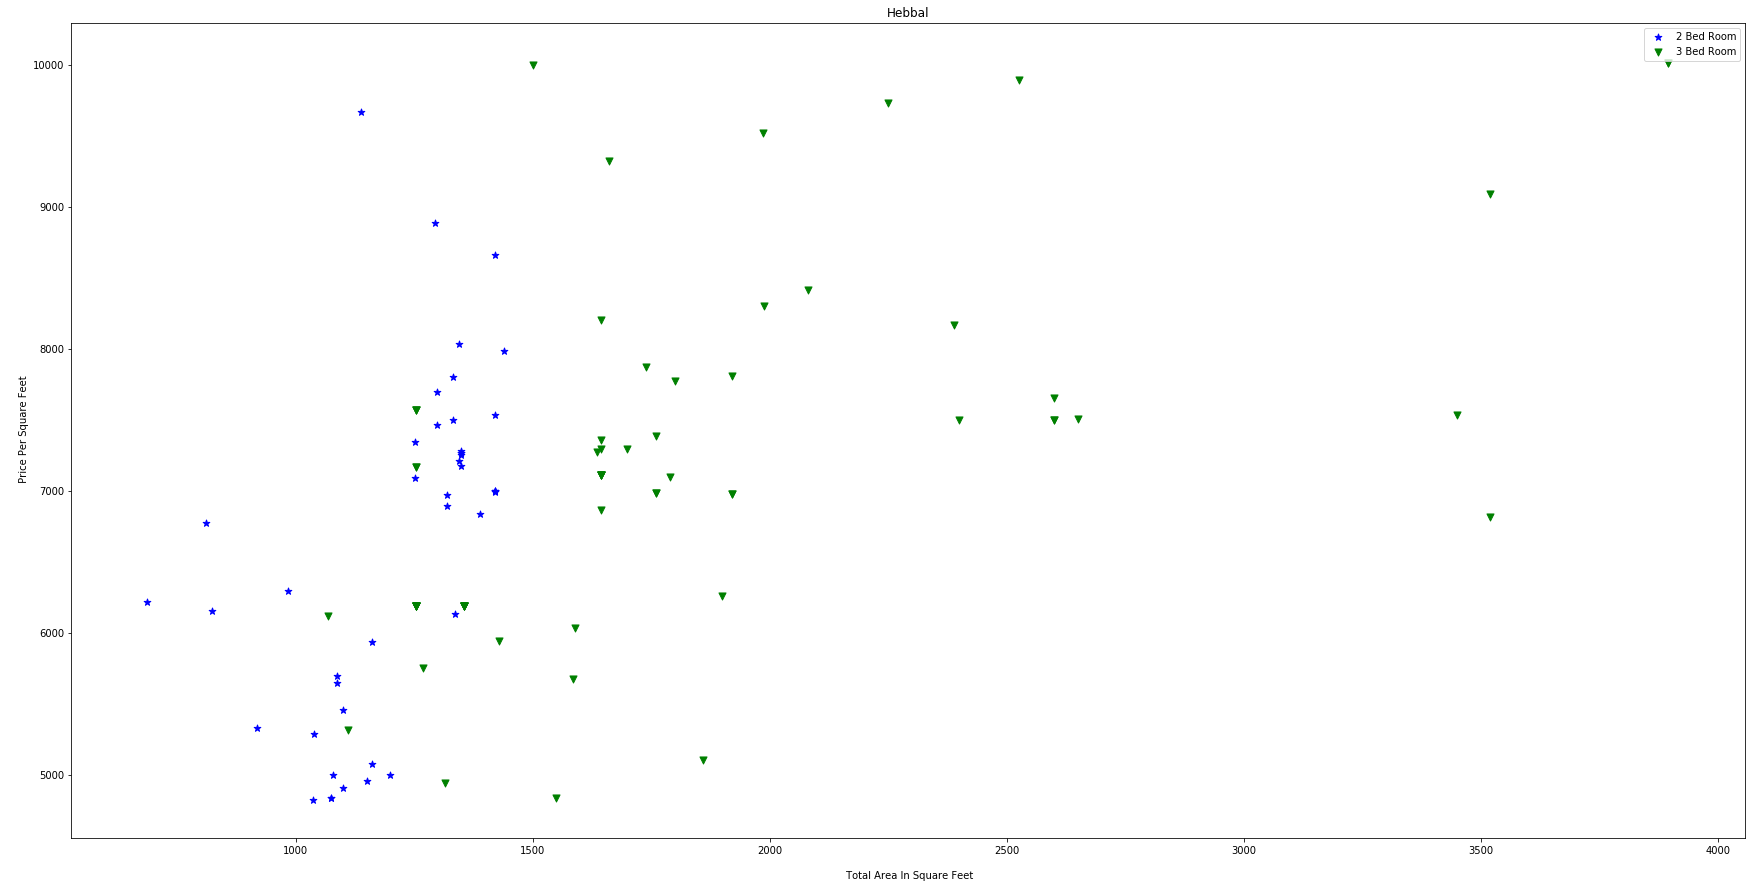

In [44]:
scatter_plot(df7, "Hebbal")

Text(0, 0.5, 'Count')

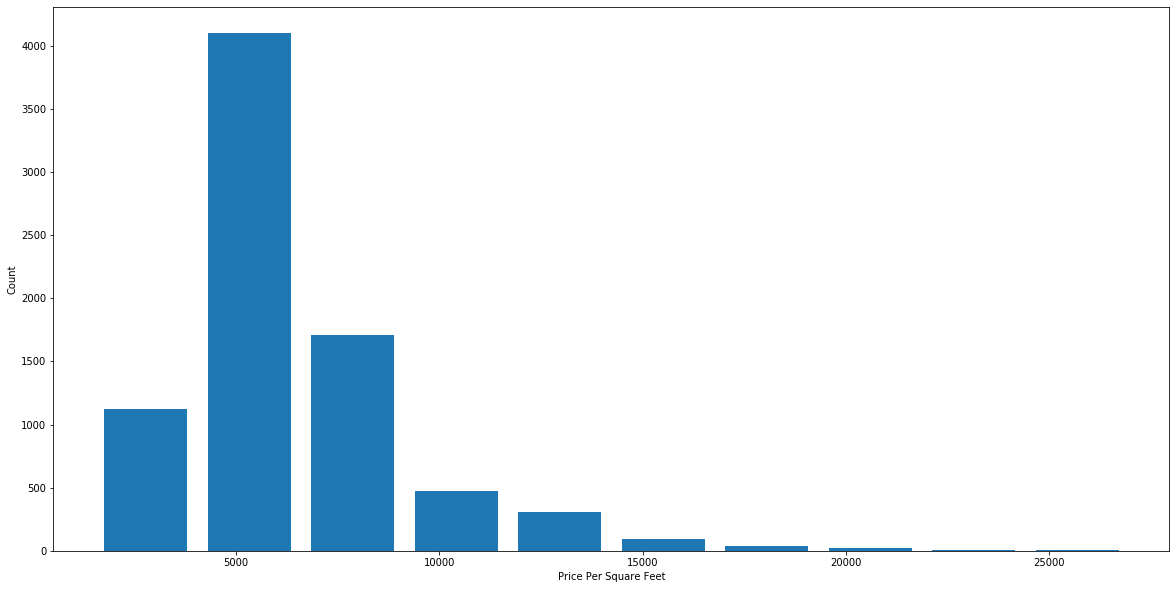

In [45]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth  = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7., 14.,  9., 10., 12., 27.,
       11., 16., 13.])

In [47]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
647,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5714,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8828,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
8833,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
8880,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
9168,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9932,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10273,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

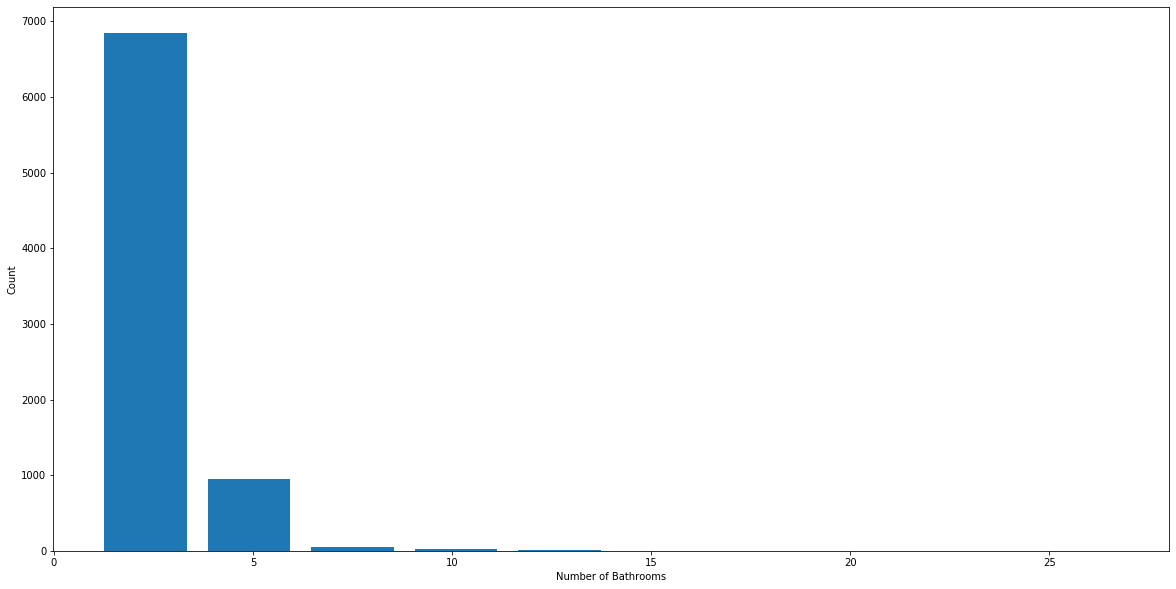

In [48]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [49]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
647,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1653,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1789,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5673,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7228,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8880,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
10287,other,6 Bedroom,1200.0,9.0,122.0,6,10166.666667


In [50]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7785, 7)

In [51]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6


Machine Learning 

In [52]:
dummies = pd.get_dummies(df10.location)  # ML can not calculate catagorical data like "Location"
                                         # ... so we have to convert catagorical data to numarical one
                                         #.... using dummi variable 
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df12 = df11.drop('location', axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X = df12.drop('price', axis = 'columns')     #keeping only independent columns and remove dependent column
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = df12. price
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=10)


In [59]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.772528242584807

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state= 0)
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.81103482, 0.81681531, 0.82215109, 0.77193676, 0.78728727])

In [62]:
#cv = cross validation 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.801845,{'normalize': True}
1,lasso,0.659655,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.736304,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [64]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=257)

In [65]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


87.42281264636951